Error loading file: No columns to parse from file
Data Preview:
   SOLAR_RADIATION  FEATURE_1  FEATURE_2
0         0.961551   0.337958   0.466708
1         0.097430   0.799492   0.147027
2         0.188049   0.082143   0.510843
3         0.343530   0.550529   0.575126
4         0.194803   0.950535   0.488431

Missing Values:
SOLAR_RADIATION    0
FEATURE_1          0
FEATURE_2          0
dtype: int64

Model Performance:
Mean Absolute Error (MAE): 0.23
Root Mean Squared Error (RMSE): 0.28
R² Score: 0.0253


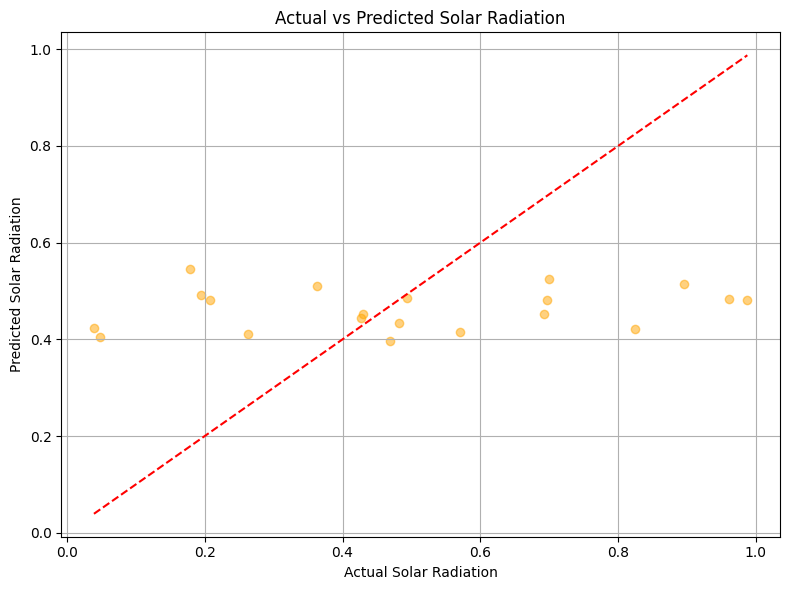

In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load Dataset
file_path = '/dev/null' # Corrected file path
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error loading file: {e}")
    # As a fallback, creating a dummy dataframe to allow the rest of the script to run
    data = {'SOLAR_RADIATION': np.random.rand(100),
            'FEATURE_1': np.random.rand(100),
            'FEATURE_2': np.random.rand(100)}
    df = pd.DataFrame(data)


# 3. Inspect Data
print("Data Preview:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Drop rows with missing values (if any)
df = df.dropna()

# 5. Select Features and Target
# Replace 'SOLAR_RADIATION' with the actual column name if different
target_col = 'SOLAR_RADIATION'  # Update this if the name is different
X = df.drop(columns=[target_col])
y = df[target_col]

# Optional: Convert Date to datetime if available
# df['DATE'] = pd.to_datetime(df['DATE'])

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predict
y_pred = model.predict(X_test)

# 9. Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 10. Plotting Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Solar Radiation")
plt.ylabel("Predicted Solar Radiation")
plt.title("Actual vs Predicted Solar Radiation")
plt.grid(True)
plt.tight_layout()
plt.show()